### Import All the required libraries here 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

G.add_nodes_from(["A", "B","C","D","E","F","G","H"]) 

In [3]:
edges = [("A", "B", 13),("A", "F", 5),("A","C",7),
         ("B", "A", 13),("B", "H", 3),("B","D",3),
         ("C", "A", 7),("C", "G", 5),("C","E",1),("C","D",5),
         ("D","C",5),("D", "B", 3),("D","H",2),
         ("E","C",1),("E", "G", 4),
         ("F","A",5),("F", "G", 6),
         ("G","C",5),("G", "F", 6),("G","E",4),
         ("H","B",3),("H", "D", 2)
         
         ] #add remaining edges to the list

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

In [4]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)


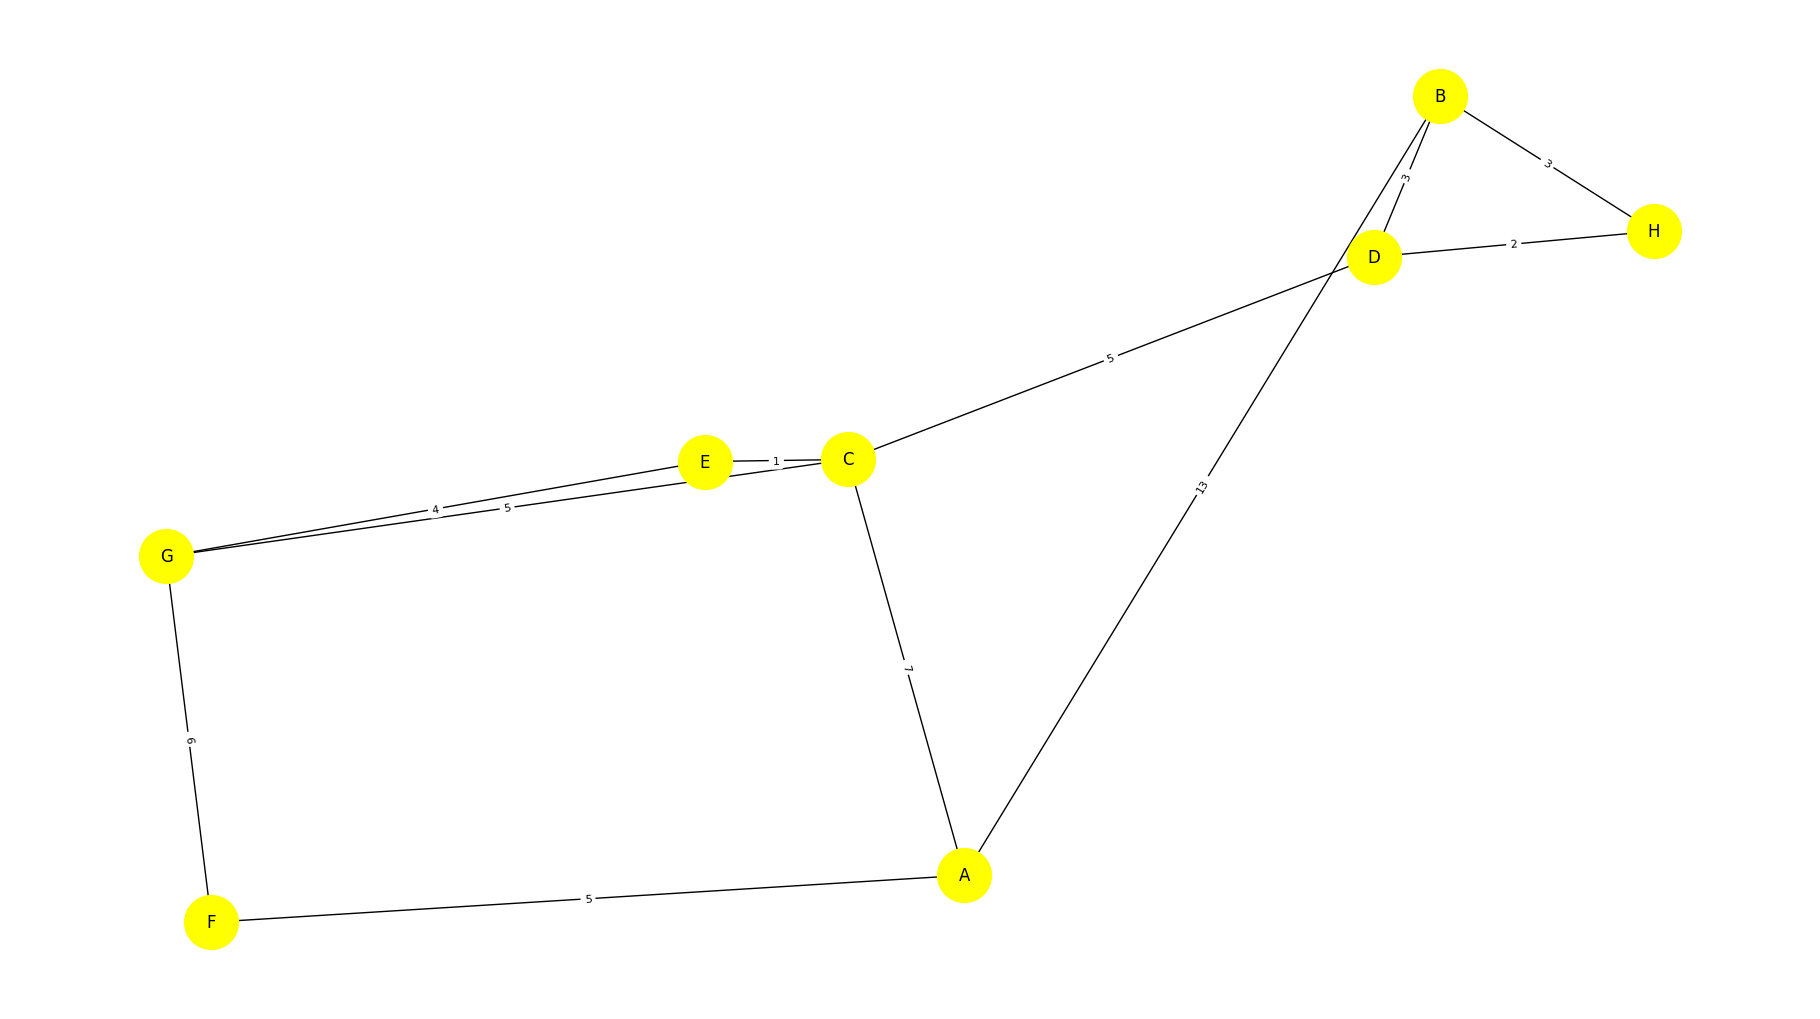

In [5]:
# Draw graph with labels and edge weights
plt.figure(figsize=(18, 10))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="yellow")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

In [6]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

In [7]:
class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

In [8]:
class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

## Breadth First Search  

In [9]:
def bfs_search(graph, start, goal):
    """Perform breadth-first search from start to goal."""
    
    
    #your code 
    start_node = Node(state=start, parent=None, action=None)
    
    frontier = QueueFrontier()

        
    frontier.add(start_node)
    explored = set()
    
    while True:
        if frontier.empty():
            return None
        
        node = frontier.remove()
        explored.add(node.state)
        
        if node.state == goal:
            actions = []
            states = []
            while node.parent is not None:
                actions.append('{weight:' + str(node.action)+ '}')
                states.append(node.state)
                node = node.parent
            actions.reverse()
            states.reverse()
            return (actions, states)

        for neighbor in graph.neighbors(node.state):
            if neighbor not in explored and not frontier.contains_state(neighbor):
                child_node = Node(state=neighbor, parent=node, action=graph.edges[(node.state, neighbor)]['weight'])
                frontier.add(child_node)
    

### DEPTH FIRST SEARCH

In [10]:
def dfs_search(graph, start, goal):
    """Perform depth-first search from start to goal."""
    
    #your code
    start_node = Node(state=start, parent=None, action=None)
    
    frontier = StackFrontier()

        
    frontier.add(start_node)
    explored = set()
    
    while True:
        if frontier.empty():
            return None
        
        node = frontier.remove()
        explored.add(node.state)
        
        if node.state == goal:
            actions = []
            states = []
            while node.parent is not None:
                actions.append('{weight:' + str(node.action)+ '}')
                states.append(node.state)
                node = node.parent
            actions.reverse()
            states.reverse()
            return (actions, states)

        for neighbor in graph.neighbors(node.state):
            if neighbor not in explored and not frontier.contains_state(neighbor):
                child_node = Node(state=neighbor, parent=node, action=graph.edges[(node.state, neighbor)]['weight'])
                frontier.add(child_node)
    



In [11]:
# Perform a BFS search from Arad to Bucharest
actions, nodes = bfs_search(G, 'B', 'G')
print('BFS path from B to G:')
print(actions)
print(nodes)

# Perform a DFS search from Arad to Bucharest
actions, nodes = dfs_search(G, 'B', 'G')
print('DFS path from B to G:')
print(actions)
print(nodes)

BFS path from B to G:
['{weight:13}', '{weight:5}', '{weight:6}']
['A', 'F', 'G']
DFS path from B to G:
['{weight:3}', '{weight:5}', '{weight:5}']
['D', 'C', 'G']
